# Lesson 2: Data Exploration and Linear Regression

## Import Packages

In [25]:
#Importing packages
import pandas as pd # Package for data manipulation
import numpy as np # Package for working with arrays and matrices
import matplotlib.pyplot as plt # Package for creating visualizations
import seaborn as sns # Packag for creating visualizations (easier & more colorful than matplotlib)
from sklearn.model_selection import train_test_split # Package for splitting data into training and testing sets
from sklearn.linear_model import LinearRegression # Package for building linear regression models
from sklearn.metrics import r2_score, mean_squared_error # Package for evaluating model performance
import warnings
warnings.filterwarnings('ignore') # Mute Warnings

## Import and Visualize the Data

In [26]:
# Have pandas read thee salary data csv file
df = pd.read_csv("files/Salary Data.csv")
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


## Get to know and Visualize the Data

In [27]:
# This wll give you the data types of each column
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

Text(0.5, 1.0, 'Salary Distribution')

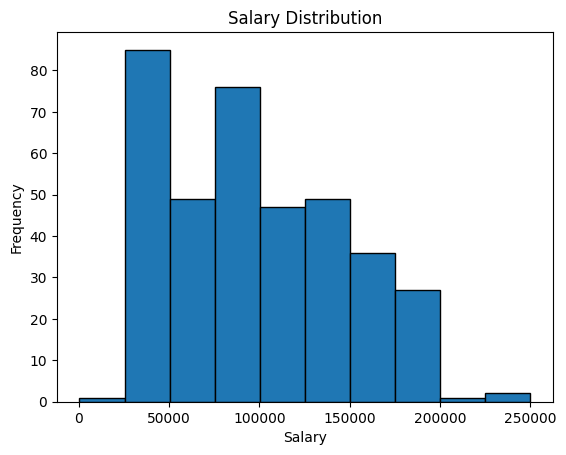

In [28]:
# Plot a histogram of the Salary distribution
fig, ax = plt.subplots()
ax.hist(df['Salary'], bins=10, edgecolor="black")
ax.set_xlabel('Salary')
ax.set_ylabel('Frequency')
ax.set_title('Salary Distribution')

Text(0.5, 1.0, 'Years of Experience vs Salary')

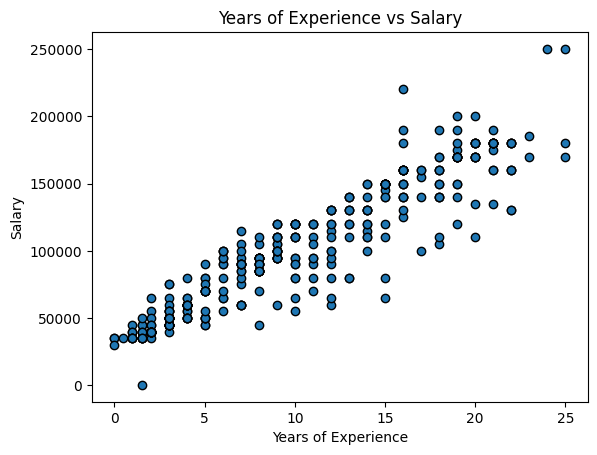

In [29]:
# Plot a graph of Salary vs Years of Experience
fig_1, ax_1 = plt.subplots()
ax_1.scatter(df['Years of Experience'], df['Salary'], edgecolor='black')
ax_1.set_xlabel('Years of Experience')
ax_1.set_ylabel('Salary')
ax_1.set_title('Years of Experience vs Salary')

Text(0.5, 1.0, 'Age vs Salary')

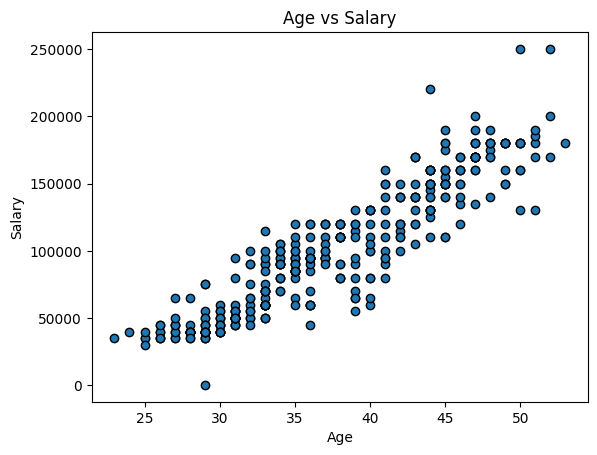

In [30]:
# Plot a graph of Salary vs. Age
fig_2, ax_2 = plt.subplots()
ax_2.scatter(df['Age'], df['Salary'], edgecolor='black')
ax_2.set_xlabel('Age')
ax_2.set_ylabel('Salary')
ax_2.set_title('Age vs Salary')

Text(0.5, 1.0, 'Gender vs Salary')

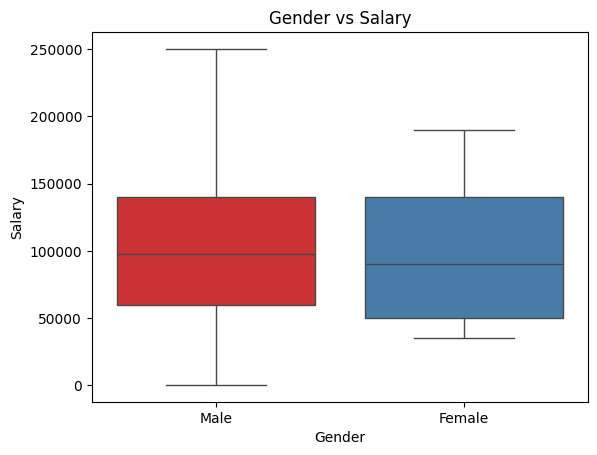

In [31]:
fig_3, ax_3 = plt.subplots()
sns.boxplot(x=df['Gender'], y=df['Salary'], ax=ax_3, palette="Set1")
ax_3.set_xlabel('Gender')
ax_3.set_title('Gender vs Salary')

Text(0.5, 1.0, 'Education Level vs Salary')

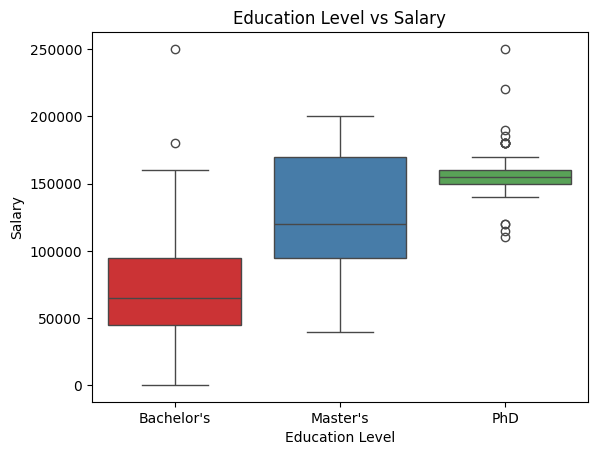

In [32]:
fig_4, ax_4 = plt.subplots()
sns.boxplot(x=df['Education Level'], y=df['Salary'], ax=ax_4, palette="Set1")
ax_4.set_xlabel('Education Level')
ax_4.set_title('Education Level vs Salary')

Text(0.5, 1.0, 'Correlation Matrix')

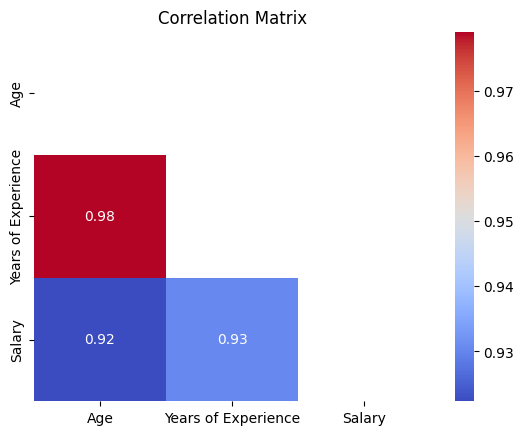

In [33]:
fig_5, ax_5 = plt.subplots()
corr = df.corr(numeric_only=True)
# np.ones_like() creates an array of ones
# np.triu() creates a matrix where the numbers below the diagonal are equal to zero
mask = np.triu(np.ones_like(corr, dtype=bool))
# mask works by hiding whenever the mask is true for a specific spot in the matrix
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, ax=ax_5)
ax_5.set_title('Correlation Matrix')

## Build a Linear Regression Model

In [34]:
# Make dummy variables
df_cleaned = pd.get_dummies(df, columns=['Gender', 'Education Level']).dropna(how='any')
df_cleaned
#Separate X and y
X = df_cleaned.drop(columns=["Job Title", "Salary"]) # Dropeed Job title because it has alot of categories.
y = df_cleaned["Salary"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build/fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on training set
y_pred_train = model.predict(X_train)

# Make predictions on test set
y_pred_test = model.predict(X_test)

# Evaluate model performance
r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)

r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"R2 score on training set: {r2_train}")
print(f"R2 score on test set: {r2_test}")
print(f"Mean squared error on training set: {mse_train}")
print(f"Mean squared error on test set: {mse_test}")

R2 score on training set: 0.9014091547262573
R2 score on test set: 0.9033022217642329
Mean squared error on training set: 226800971.4499862
Mean squared error on test set: 231840874.026462


## Linear Regression with Statsmodels

In [35]:
import statsmodels.api as sm

# Convert boolean columns to integers
X_train_sm = sm.add_constant(X_train).astype(int)

lr_model = sm.OLS(y_train, X_train_sm).fit()


# Make predictions on training set
y_pred_train_sm = lr_model.predict(X_train_sm)
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     535.8
Date:                Sun, 03 Aug 2025   Prob (F-statistic):          9.22e-145
Time:                        17:39:00   Log-Likelihood:                -3289.1
No. Observations:                 298   AIC:                             6590.
Df Residuals:                     292   BIC:                             6612.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -2.505e+04   9363.690     -2.675      0.008   -4.35e+04   -6617.134
Age                         3552.7075    638.123      5.567      0.000    2296.803    4808.612
Years of Experience         1979.7905    705.448      2.806      0.005     591.383    3368.198
Gender_Female              -1.636e+04   4857.170     -3.368      0.001   -2.59e+04   -6797.374
Gender_Male                -8689.1387   4670.968     -1.860      0.064   -1.79e+04     503.893
Education Level_Bachelor's -2.431e+04   3501.678     -6.941      0.000   -3.12e+04   -1.74e+04
Education Level_Master's   -3873.7720   3360.332     -1.153      0.250   -1.05e+04    2739.770
Education Level_PhD         3134.3430   3764.359      0.833      0.406   -4274.372    1.05e+04
==============================================================================
Omnibus:                       12.954   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               29.409
Skew:                           0.061   Prob(JB):                     4.11e-07
Kurtosis:                       4.534   Cond. No.                     3.31e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.29e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""